In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import dask
print(dask.__version__)

2022.7.0


In [3]:
from dask_jobqueue import SLURMCluster

# Compose SLURM script
cluster = SLURMCluster(queue='caslake', cores=20, memory='80GB', 
                       processes=10, walltime='04:00:00', interface='ib0',
                       job_extra=['--account=macs30123']
                      )

# Request resources
cluster.scale(jobs=1)

/home/anitasun/.local/lib/python3.9/site-packages/distributed/node.py:179: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33565 instead
  warnings.warn(


In [10]:
!squeue -u anitasun

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          31342175   caslake mesa_bat anitasun PD       0:00      1 (Priority)
          31343607   caslake dask-wor anitasun  R       4:53      1 midway3-0146


In [11]:
from dask.distributed import Client

client = Client(cluster)
client

<Client: 'tcp://172.25.0.65:45047' processes=10 threads=20, memory=74.50 GiB>

In [12]:
import dask.dataframe as dd

In [19]:
!squeue -p caslake --state=PENDING

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          31341755   caslake     feat  jchen28 PD       0:00      1 (Resources)
          31343948   caslake     feat  jchen28 PD       0:00      1 (Priority)
          31343940   caslake     feat  jchen28 PD       0:00      1 (Priority)
          31343941   caslake     feat  jchen28 PD       0:00      1 (Priority)
          31343943   caslake     feat  jchen28 PD       0:00      1 (Priority)
          31343946   caslake     feat  jchen28 PD       0:00      1 (Priority)
          31343947   caslake     feat  jchen28 PD       0:00      1 (Priority)
          31343950   caslake     feat  jchen28 PD       0:00      1 (Priority)
          31343952   caslake     feat  jchen28 PD       0:00      1 (Priority)
          31343953   caslake     feat  jchen28 PD       0:00      1 (Priority)
          31343957   caslake     feat  jchen28 PD       0:00      1 (Priority)
          31345471   caslake nf-TRIMG  lyang1

In [38]:
df = dd.read_csv('batch_test.csv')

In [40]:
df.columns

Index(['Unnamed: 0', 'RunId', 'iteration', 'Step', 'neighbor_dance_thres',
       'alcohol_dance_thres', 'energy', 'alcohol_prop', 'extro_floor',
       'extro_ceiling', 'k', 'p', 'network_type', 'seed', 'Dancing Queens',
       'Party Poopers', 'Kaput', 'Dancing Queens Ratio',
       'Total Cumulative DQ Integral', 'Total Dancing Steps'],
      dtype='object')

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df['p'] = df['p'].round(2)
df['k'] = df['k'].astype(int) # for ease of analysis

Text(0.5, 1.0, 'Proportion of Alcohol Drinkers vs Total Dancing Volume - Watts-Strogatz')

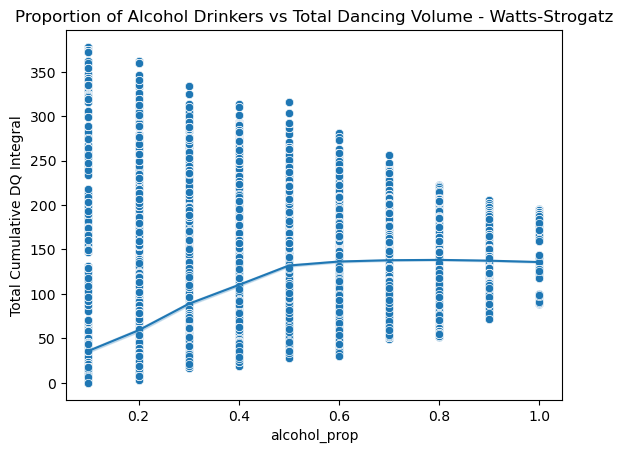

In [44]:
sns.scatterplot(data=df,
                x="alcohol_prop",
                y="Total Cumulative DQ Integral")
sns.lineplot(data=df,
                x="alcohol_prop",
                y="Total Cumulative DQ Integral")

plt.title('Proportion of Alcohol Drinkers vs Total Dancing Volume - Watts-Strogatz')

Text(0.5, 1.0, 'Proportions of Alcohol Drinkers vs Total Dancing Volume - Watts-Strogatz')

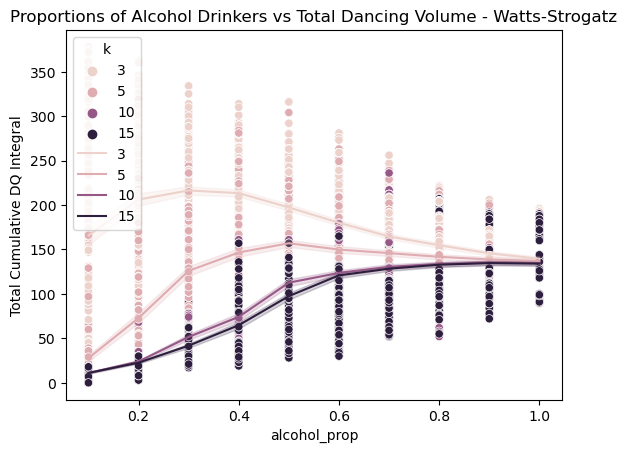

In [45]:
sns.scatterplot(data=df[df['k'].isin([3, 5, 10, 15])],
                x='alcohol_prop',
                y='Total Cumulative DQ Integral',
                hue='k')
sns.lineplot(data=df[df['k'].isin([3, 5, 10, 15])],
                x='alcohol_prop',
                y='Total Cumulative DQ Integral',
                hue='k')

plt.title('Proportions of Alcohol Drinkers vs Total Dancing Volume - Watts-Strogatz')

Text(0.5, 1.0, 'Proportions of Alcohol Drinkers vs Total Dancing Volume - Watts-Strogatz')

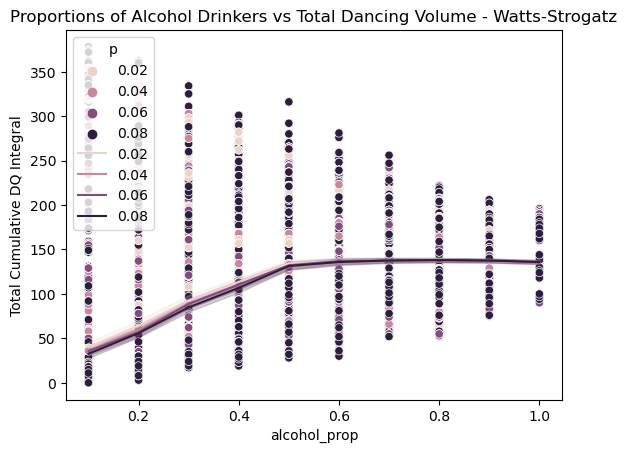

In [46]:
sns.scatterplot(data=df[df['p'].isin([0.02, 0.04, 0.06, 0.08,])],
                x='alcohol_prop',
                y='Total Cumulative DQ Integral',
                hue='p')
sns.lineplot(data=df[df['p'].isin([0.02, 0.04, 0.06, 0.08,])],
                x='alcohol_prop',
                y='Total Cumulative DQ Integral',
                hue='p')

plt.title('Proportions of Alcohol Drinkers vs Total Dancing Volume - Watts-Strogatz')

Text(0.5, 1.0, 'Proportions of Alcohol Drinkers vs Dancing Duration - Watts-Strogatz')

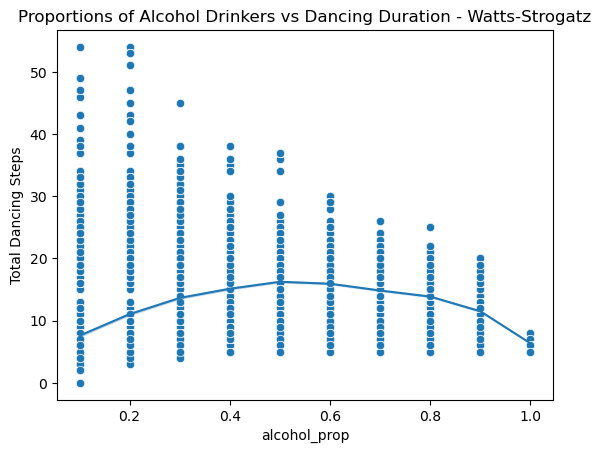

In [47]:
sns.scatterplot(data=df,
                x="alcohol_prop",
                y="Total Dancing Steps")
sns.lineplot(data=df,
                x="alcohol_prop",
                y="Total Dancing Steps")

plt.title('Proportions of Alcohol Drinkers vs Dancing Duration - Watts-Strogatz')

Text(0.5, 1.0, 'Proportion of Alcohol Drinkers vs Dancing Duration - Watts-Strogatz')

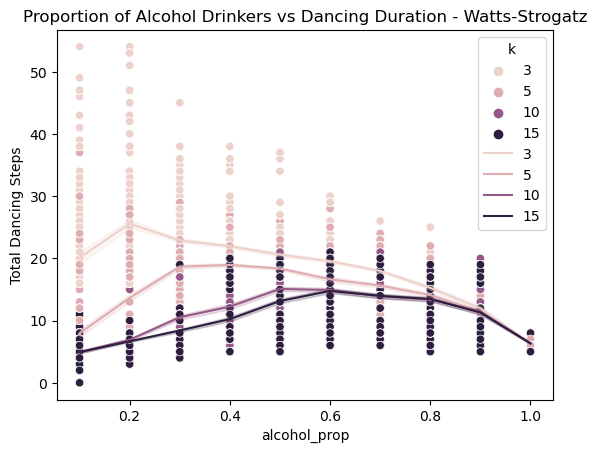

In [48]:
sns.scatterplot(data=df[df['k'].isin([3, 5, 10, 15])],
                x="alcohol_prop",
                y="Total Dancing Steps",
                hue="k")
sns.lineplot(data=df[df['k'].isin([3, 5, 10, 15])],
                x="alcohol_prop",
                y="Total Dancing Steps",
                hue="k")
plt.title('Proportion of Alcohol Drinkers vs Dancing Duration - Watts-Strogatz')

Text(0.5, 1.0, 'Proportion of Alcohol Drinkers vs Dancing Duration - Watts-Strogatz')

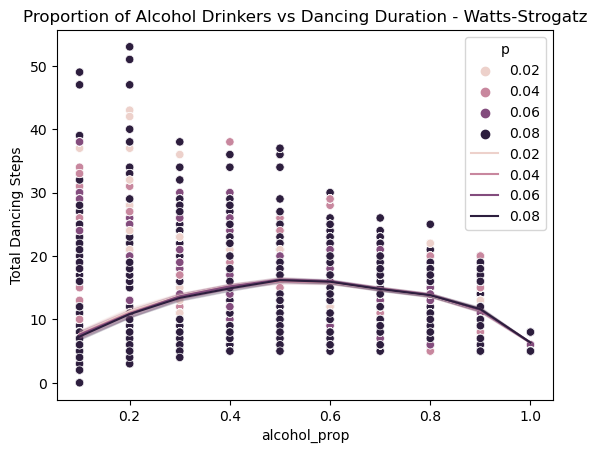

In [49]:
sns.scatterplot(data=df[df['p'].isin([0.02, 0.04, 0.06, 0.08,])],
                x="alcohol_prop",
                y="Total Dancing Steps",
                hue="p")
sns.lineplot(data=df[df['p'].isin([0.02, 0.04, 0.06, 0.08,])],
                x="alcohol_prop",
                y="Total Dancing Steps",
                hue="p")
plt.title('Proportion of Alcohol Drinkers vs Dancing Duration - Watts-Strogatz')